<a href="https://colab.research.google.com/github/andysontran/2-CHL5230-F23/blob/main/2_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Clone files on repository to Drive
!git clone https://github.com/andysontran/2-CHL5230-F23.git

# Set working directory
%cd 2-CHL5230-F23/

Mounted at /content/drive
Cloning into '2-CHL5230-F23'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 77 (delta 28), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (77/77), 2.07 MiB | 5.97 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/2-CHL5230-F23


In [2]:
# Read CSV file into Pandas df
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


**Dataframe characteristics:**

*   1465 rows, 12 columns
*   Columns: age (range: 14-73), gender (1-2), air pollution (1-8), alcohol usage (1-8), genetic risk (1-7), lung disease (1-7), obesity (1-7), smoking (1-8), passive smoker (1-8), chest pain (1-9), coughing of blood (1-9), severity (0-3)
*   Missing values = 0



In [3]:
# Get shape of df
print(df.shape)

(1465, 12)


In [4]:
# List columns of df
print(df.columns)

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk',
       'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Severity'],
      dtype='object')


In [5]:
# Display summary statistics
print(df.describe())

               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker   Chest Pain  \
count   1465.000000  1465.000000  1465.000000     1465.000000  1465.000000   
mean       3.741297     3.844369     3.425256        3.606826     3.817065   
std        1.899984     2.072213     2.273040        2

In [6]:
# Check for missing values in each column
print(df.isnull().sum())

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


*Visualizing the Distribution*

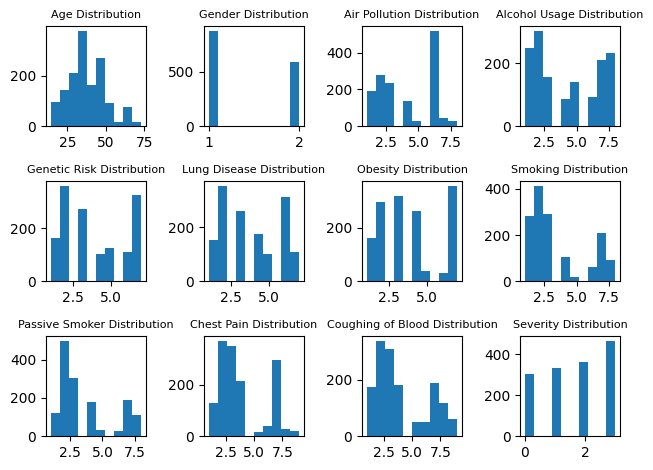

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a histogram
def draw_histograms(df, variables, n_rows, n_cols):
  fig = plt.figure()
  for i, var_name in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    df[var_name].hist(bins = 10, ax = ax)
    ax.set_title(var_name + " Distribution")
    ax.title.set_size(8)
    ax.grid(False)
  fig.tight_layout()
  plt.show()

draw_histograms(df, df.columns, 3, 4)

*Checking for Outliers*

In [9]:
# Check for outliers
import plotly.express as px

# Create an interactive box plot for the variables
for column in df.select_dtypes(include=['number']).columns:
                               fig_box = px.box(df, x= column, y = 'Severity', title=f'Box Plot of {column}')
                               fig_box.show('colab')

*Checking for Variance*

In [10]:
# Check for variance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_percentage_tables(dataframe, target_variable):
    variable_columns = [col for col in dataframe.columns if col != target_variable]

    for variable_column in variable_columns:
        distribution_table = pd.crosstab(index=dataframe[variable_column], columns=dataframe[target_variable], normalize='index') * 100
        print(f"Percentage Distribution Table for {variable_column} vs. {target_variable}:")
        print(distribution_table)
        print("\n")

# Call the function to generate percentage distribution tables for all variables against 'Severity'
generate_percentage_tables(df, target_variable='Severity')

Percentage Distribution Table for Age vs. Severity:
Severity          0          1          2          3
Age                                                 
14         0.000000  64.285714   0.000000  35.714286
17        33.333333  33.333333   0.000000  33.333333
18        36.000000   0.000000  36.000000  28.000000
19         0.000000  34.482759  34.482759  31.034483
22        37.037037  33.333333   0.000000  29.629630
23        33.333333  37.037037   0.000000  29.629630
24        41.304348   2.173913  21.739130  34.782609
25        44.444444   0.000000  22.222222  33.333333
26        19.230769   1.923077  50.000000  28.846154
27        42.253521  12.676056  12.676056  32.394366
28        22.916667  20.833333  22.916667  33.333333
29         0.000000   0.000000  67.857143  32.142857
31         0.000000  75.000000   0.000000  25.000000
32        21.739130  45.652174   0.000000  32.608696
33        20.202020  20.202020  29.292929  30.303030
34         0.000000   0.000000  62.500000  37.5

*Checking for Collinearity*

                        Age    Gender  Air Pollution  Alcohol Usage  \
Age                1.000000 -0.104146       0.041456       0.132828   
Gender            -0.104146  1.000000      -0.165097      -0.155158   
Air Pollution      0.041456 -0.165097       1.000000       0.512734   
Alcohol Usage      0.132828 -0.155158       0.512734       1.000000   
Genetic Risk       0.034801 -0.157086       0.427816       0.711012   
Lung Disease       0.080342 -0.141740       0.382661       0.594977   
Obesity            0.011607 -0.093119       0.379112       0.548102   
Smoking            0.052435 -0.170858       0.323364       0.487187   
Passive Smoker    -0.003206 -0.143020       0.412868       0.510851   
Chest Pain         0.013554 -0.166448       0.394851       0.603992   
Coughing of Blood  0.039650 -0.105924       0.365993       0.561570   
Severity           0.035742 -0.074792       0.382265       0.223088   

                   Genetic Risk  Lung Disease   Obesity   Smoking  \
Age    

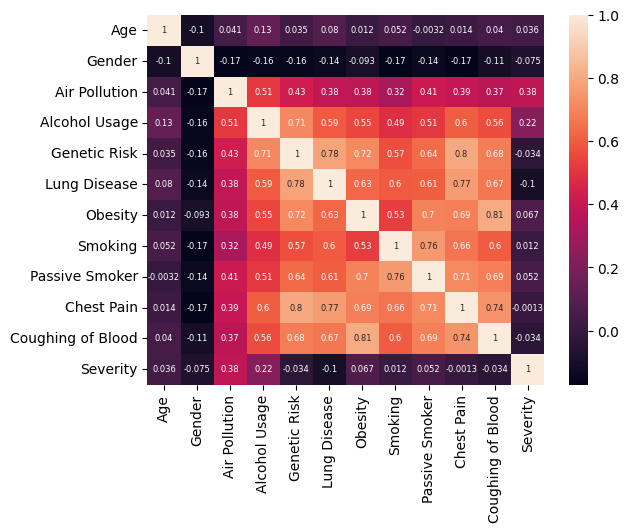

In [11]:
# Plotting the confusion matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_c = pd.DataFrame(df)
corr_Matrix = df_c.corr()
print(corr_Matrix)

sns.heatmap(corr_Matrix, annot = True, annot_kws = {"fontsize":6})
plt.show()

**Implement K-NN with Scikit-Learn**

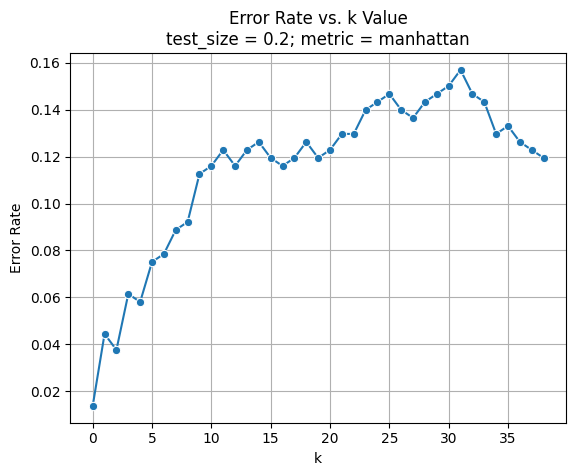

In [12]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into features and label
## Features: Age	Gender	Air Pollution	Alcohol Usage	Genetic Risk	Lung Disease
##           Obesity	Smoking	Passive Smoker	Chest Pain	Coughing of Blood
## Label:    Severity
X = df[['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking','Passive Smoker','Chest Pain',
        'Coughing of Blood']]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance metric used
met = 'manhattan'

# Check error rate for k = 1 to 40
error_rate = []

for k in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = k, metric = met)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error_rate.append(1 - accuracy_score(y_test, y_pred))

# Plot line graph of error rate
sns.lineplot(error_rate, marker = 'o')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k Value\ntest_size = 0.2; metric = manhattan')

plt.show()

*K-NN with k = 1 (lowest error rate, most prone to overfitting)*

[[57  0  0  0]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 1  3  0 94]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.95      1.00      0.97        58
           2       1.00      1.00      1.00        80
           3       1.00      0.96      0.98        98

    accuracy                           0.99       293
   macro avg       0.98      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



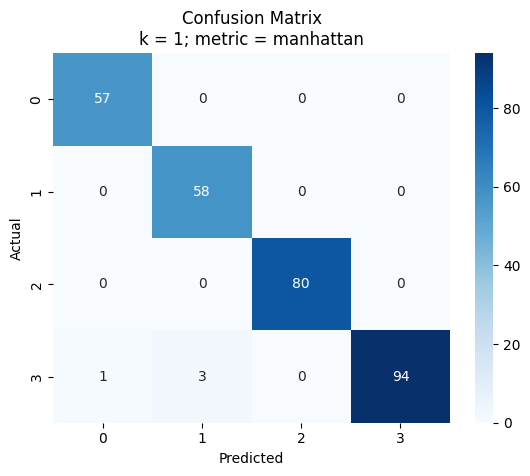

In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance metric used
met = 'manhattan'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 1, metric = met)   # Set K = 1 (lowest error rate)
knn.fit(X_train, y_train)                                   # Set metric = 'manhattan'

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 1; metric = ' + met
plt.title(title)

plt.show()

Feature: 0, Score: 0.02594
Feature: 1, Score: 0.01433
Feature: 2, Score: 0.04915
Feature: 3, Score: 0.01638
Feature: 4, Score: 0.01160
Feature: 5, Score: 0.01980
Feature: 6, Score: 0.00341
Feature: 7, Score: 0.01160
Feature: 8, Score: 0.01638
Feature: 9, Score: 0.00887
Feature: 10, Score: 0.03549


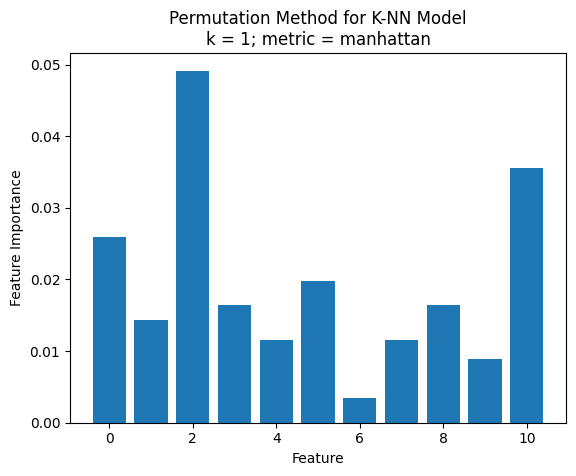

In [14]:
# Permutation for feature importance with K-NN for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Fit the model
results = permutation_importance(knn, X_test, y_test, scoring = 'accuracy')
# Get importance
importance = results.importances_mean
# Summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
title = 'Permutation Method for K-NN Model\nk = 1; metric = ' + met
plt.title(title)
plt.xlabel('Feature')

#labels = ['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
#        'Lung Disease','Obesity','Smoking','Passive Smoker','Chest Pain',
#        'Coughing of Blood']
#x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#plt.xticks(x, labels, rotation = 45)
plt.ylabel('Feature Importance')
plt.show()

*K-NN with k = 3 (2nd lowest error rate, reduces overfitting)*

[[57  0  0  0]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 2  9  0 87]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       0.87      1.00      0.93        58
           2       1.00      1.00      1.00        80
           3       1.00      0.89      0.94        98

    accuracy                           0.96       293
   macro avg       0.96      0.97      0.96       293
weighted avg       0.97      0.96      0.96       293



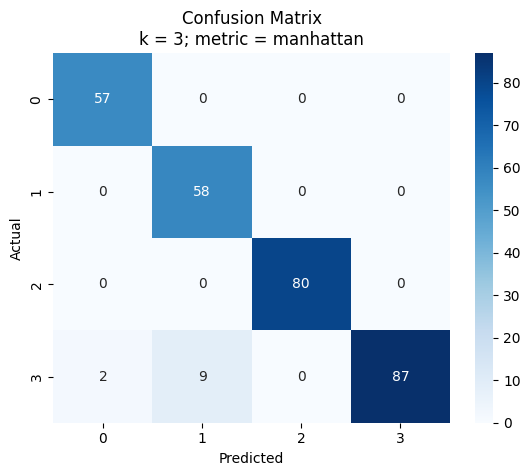

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance metric used
met = 'manhattan'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 3, metric = met)   # Set K = 3 (2nd lowest error rate, reduces overfitting)
knn.fit(X_train, y_train)                                   # Set metric = 'manhattan'

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 3; metric = ' + met
plt.title(title)

plt.show()

Feature: 0, Score: 0.01638
Feature: 1, Score: 0.00273
Feature: 2, Score: 0.01433
Feature: 3, Score: 0.00273
Feature: 4, Score: 0.00205
Feature: 5, Score: 0.00273
Feature: 6, Score: 0.00683
Feature: 7, Score: 0.00068
Feature: 8, Score: 0.00683
Feature: 9, Score: 0.00819
Feature: 10, Score: 0.02526


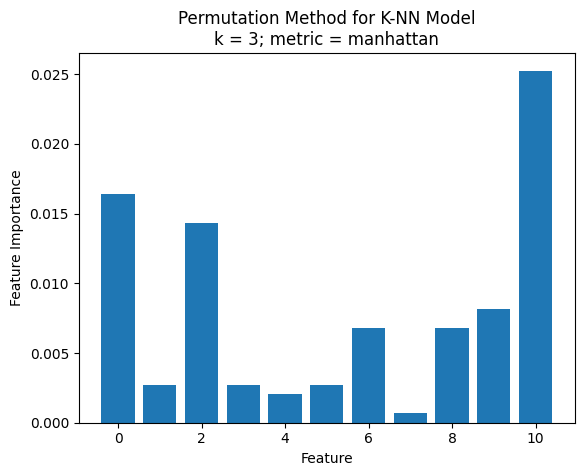

In [19]:
# Permutation for feature importance with K-NN for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Fit the model
results = permutation_importance(knn, X_test, y_test, scoring = 'accuracy')
# Get importance
importance = results.importances_mean
# Summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
title = 'Permutation Method for K-NN Model\nk = 3; metric = ' + met
plt.title(title)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

[[54  0  0  3]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 4  9  0 85]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        57
           1       0.87      1.00      0.93        58
           2       1.00      1.00      1.00        80
           3       0.97      0.87      0.91        98

    accuracy                           0.95       293
   macro avg       0.94      0.95      0.95       293
weighted avg       0.95      0.95      0.95       293



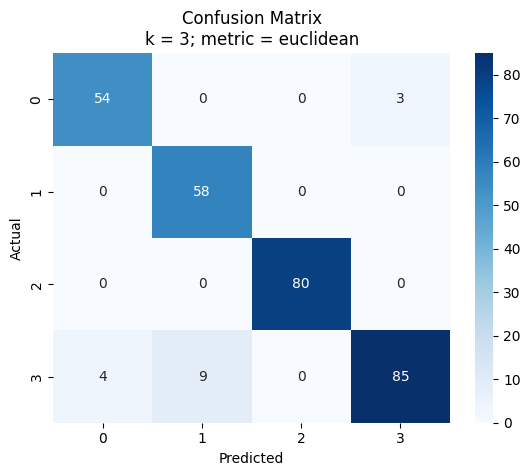

In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance metric used
met = 'euclidean'

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 3, metric = met)   # Set K = 3
knn.fit(X_train, y_train)                                   # Set metric = 'euclidean'

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = 3; metric = ' + met
plt.title(title)

plt.show()

Feature: 0, Score: 0.04710
Feature: 1, Score: 0.06348
Feature: 2, Score: 0.12355
Feature: 3, Score: 0.09898
Feature: 4, Score: 0.05256
Feature: 5, Score: 0.06826
Feature: 6, Score: 0.05324
Feature: 7, Score: 0.02253
Feature: 8, Score: 0.06826
Feature: 9, Score: 0.04846
Feature: 10, Score: 0.09625


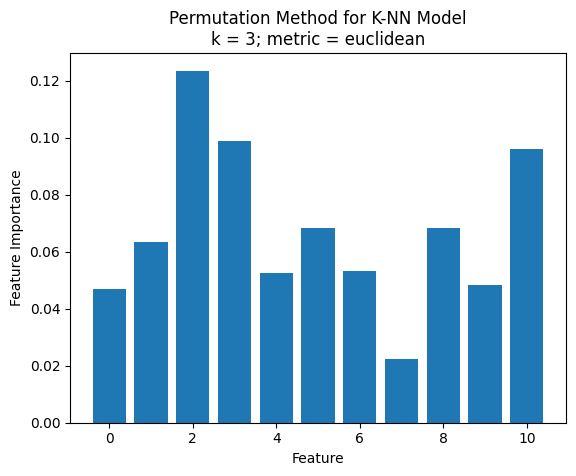

In [21]:
# Permutation for feature importance with K-NN for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Fit the model
results = permutation_importance(knn, X_test, y_test, scoring = 'accuracy')
# Get importance
importance = results.importances_mean
# Summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
title = 'Permutation Method for K-NN Model\nk = 3; metric = ' + met
plt.title(title)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

Feature: 0, Score: 0.01556
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.14184
Feature: 3, Score: 0.07439
Feature: 4, Score: 0.05837
Feature: 5, Score: 0.01564
Feature: 6, Score: 0.12236
Feature: 7, Score: 0.03662
Feature: 8, Score: 0.08297
Feature: 9, Score: 0.06000
Feature: 10, Score: 0.39225


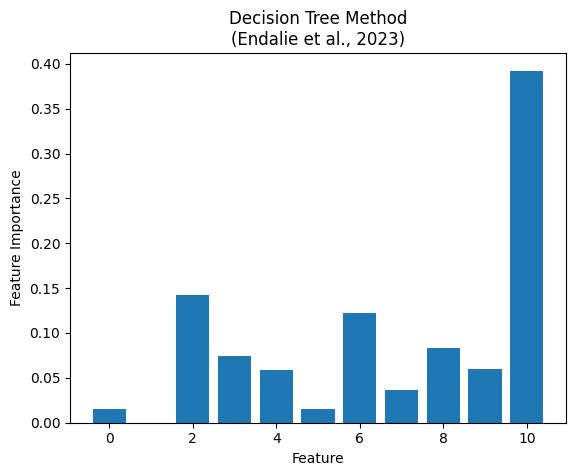

In [22]:
# Decision tree for feature importance
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Define the model
model = DecisionTreeClassifier()
# Fit the model
model.fit(X_train, y_train)
# Get importance
importance = model.feature_importances_
# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
title = 'Decision Tree Method\n(Endalie et al., 2023)'
plt.title(title)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()